In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
forecasting_df = pd.read_csv("https://raw.githubusercontent.com/Impact026/Data-Forecasting-project/refs/heads/main/forecasting_case_study.xlsx%20-%20Sheet1.csv")
print(forecasting_df.head())
print(forecasting_df.columns)
print(forecasting_df.info())
# print(forecasting_df.describe())

  Product       date  Sales Price Discount (%)  In-Store Promo  \
0    SKU1   2/5/2017  27750                 0%               0   
1    SKU1  2/12/2017  29023                 0%               1   
2    SKU1  2/19/2017  45630                17%               0   
3    SKU1  2/26/2017  26789                 0%               1   
4    SKU1   3/5/2017  41999                17%               0   

   Catalogue Promo  Store End Promo  Google_Mobility  Covid_Flag  V_DAY  \
0                0                0              0.0           0      0   
1                0                1              0.0           0      1   
2                0                0              0.0           0      0   
3                0                1              0.0           0      0   
4                0                0              0.0           0      0   

   EASTER  CHRISTMAS  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  
Index(['Produc

In [4]:
# Load the data
df = forecasting_df

# Preprocess the data
df['date'] = pd.to_datetime(df['date'])
df['Discount'] = df['Price Discount (%)'].str.rstrip('%').astype('float') / 100

# Select features and target
features = ['Discount', 'In-Store Promo', 'Catalogue Promo', 'Store End Promo', 
            'Google_Mobility', 'Covid_Flag', 'V_DAY', 'EASTER', 'CHRISTMAS']
target = 'Sales'

X = df[features]
y = df[target]

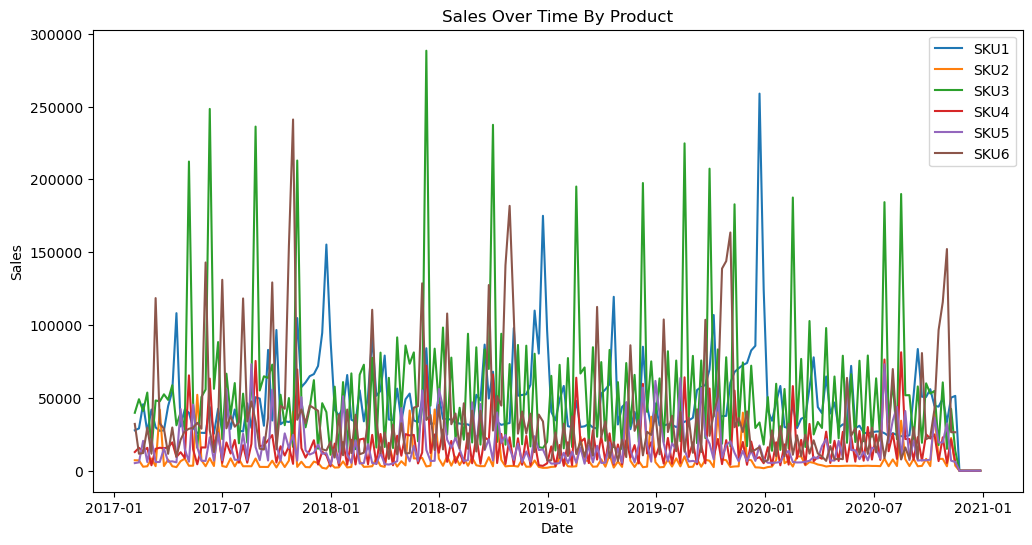

In [5]:
# Time series visualization
plt.figure(figsize=(12, 6))
for sku in forecasting_df["Product"].unique():
    sku_data = forecasting_df[forecasting_df["Product"] == sku]
    plt.plot(sku_data["date"], sku_data["Sales"], label=sku)
    
plt.legend()
plt.title("Sales Over Time By Product")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

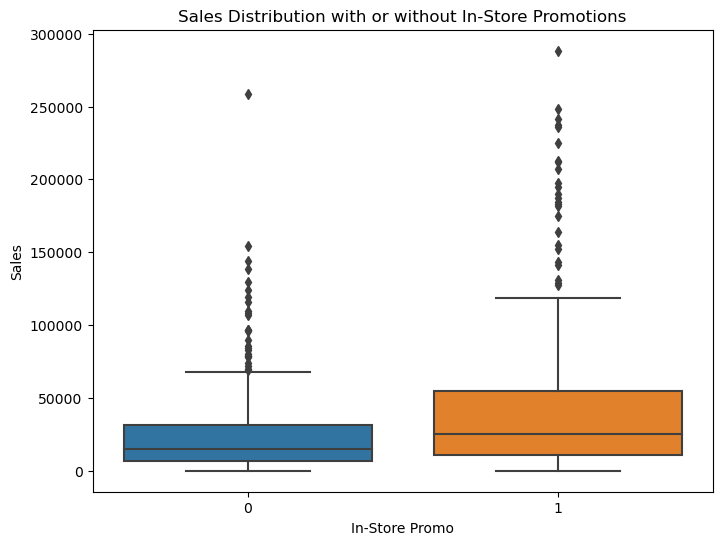

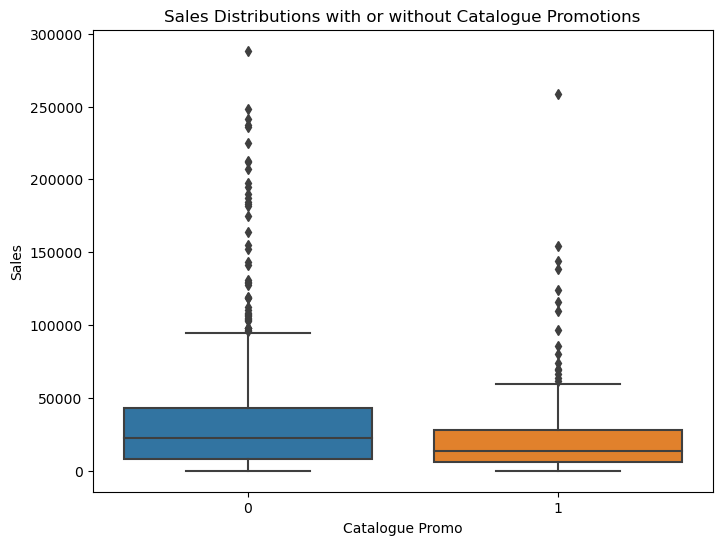

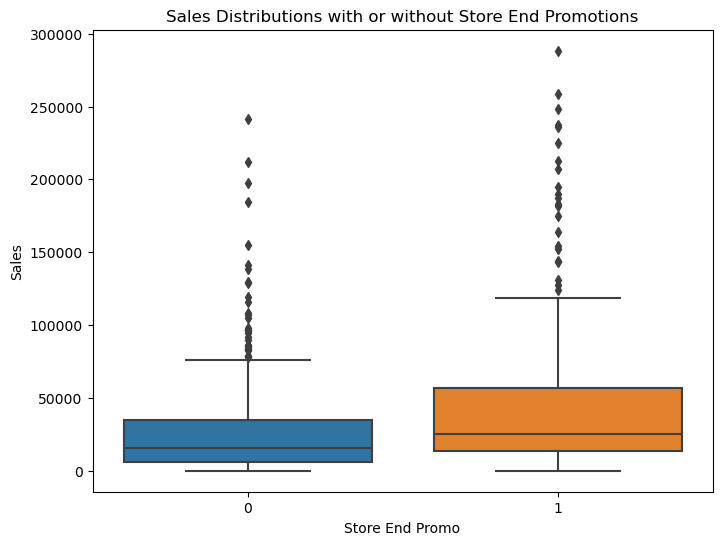

In [7]:
# Promotions against Sales
# Box plot to compare Sales with or without Promotions

plt.figure(figsize=(8,6))
sns.boxplot(x="In-Store Promo", y="Sales", data = forecasting_df)
plt.title("Sales Distribution with or without In-Store Promotions")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="Catalogue Promo", y="Sales", data=forecasting_df)
plt.title("Sales Distributions with or without Catalogue Promotions")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x="Store End Promo", y="Sales", data=forecasting_df)
plt.title("Sales Distributions with or without Store End Promotions")
plt.show()

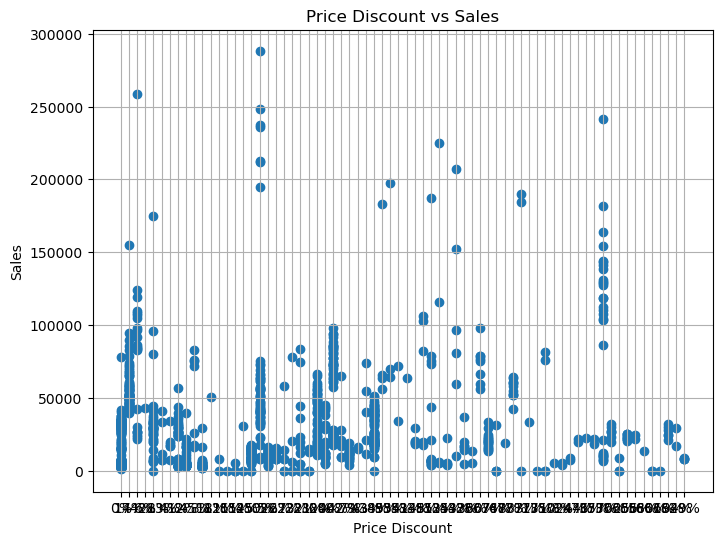

In [18]:
# Effect of Sales related to Discount Prices

plt.figure(figsize=(8,6))
plt.scatter(forecasting_df["Price Discount (%)"], forecasting_df["Sales"])
plt.title("Price Discount vs Sales")
plt.xlabel("Price Discount")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

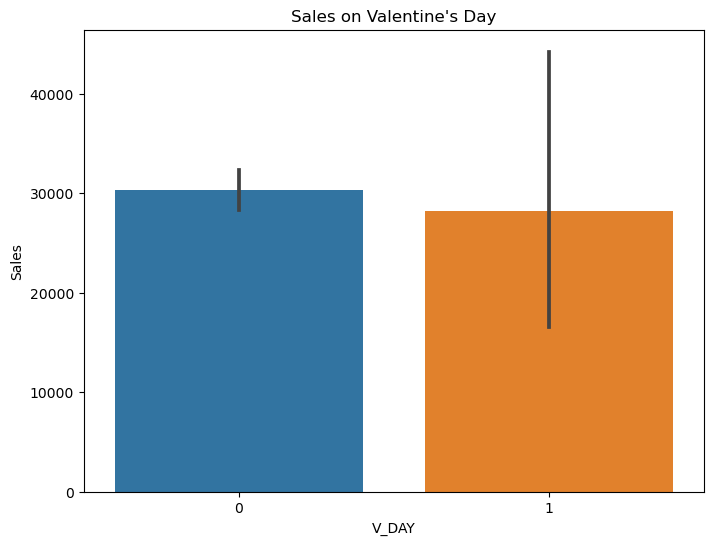

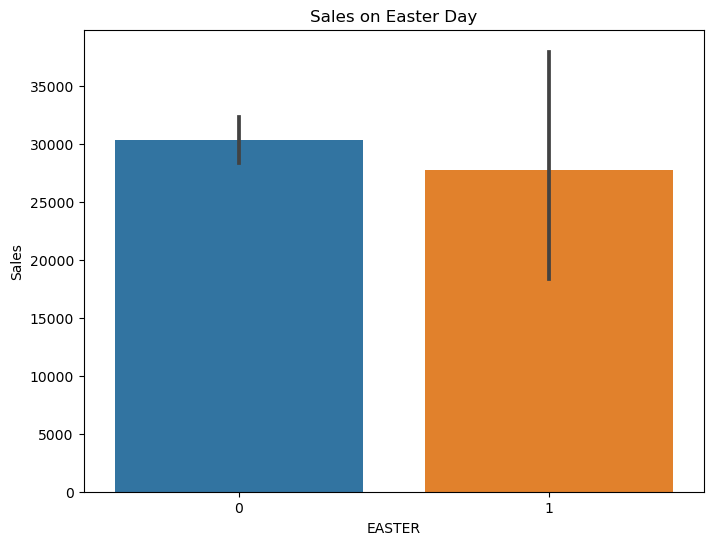

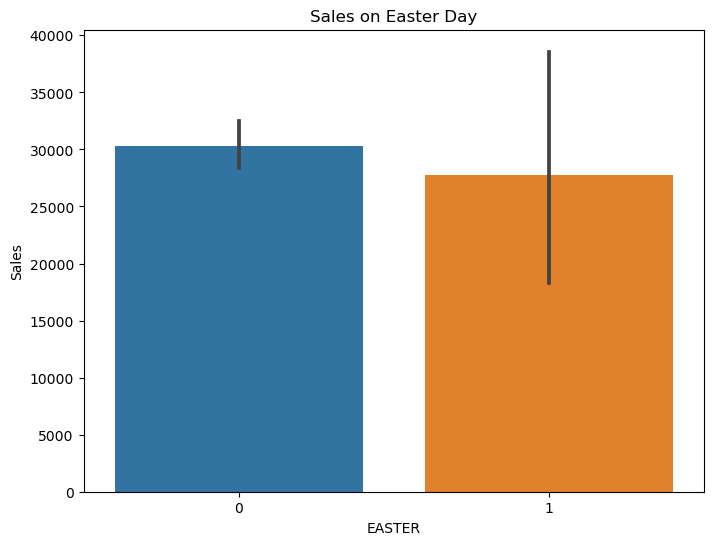

In [8]:
#Holidays against promotions

plt.figure(figsize=(8,6))
sns.barplot(x="V_DAY", y="Sales", data=forecasting_df)
plt.title("Sales on Valentine\'s Day")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x="EASTER", y="Sales", data=forecasting_df)
plt.title("Sales on Easter Day")
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x="EASTER", y="Sales", data=forecasting_df)
plt.title("Sales on Easter Day")
plt.show()

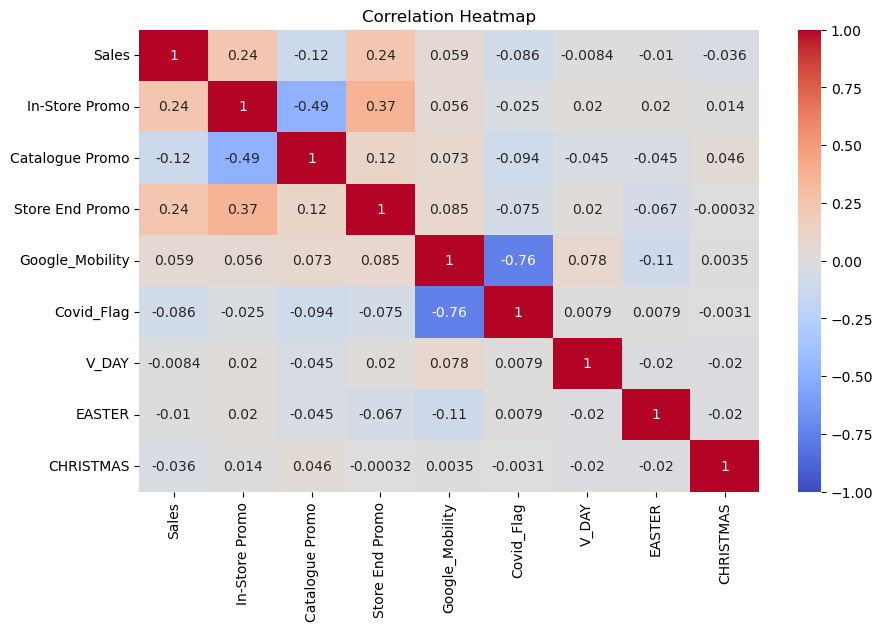

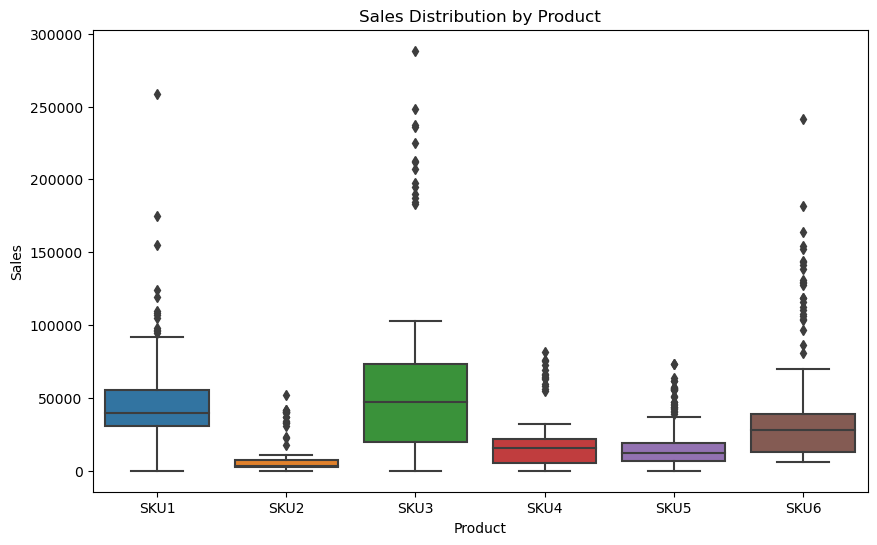

In [10]:
# Calculate a correlation matrix
corr_matrix = forecasting_df[["Sales", "In-Store Promo", "Catalogue Promo", "Store End Promo","Google_Mobility", "Covid_Flag", "V_DAY", "EASTER", "CHRISTMAS" ]].corr()

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

# Check for missing outliers in Sales
plt.figure(figsize=(10, 6))
sns.boxplot(x= "Product", y= "Sales", data =forecasting_df)
plt.title("Sales Distribution by Product")
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import time

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to calculate Weighted MAPE
def weighted_mape(y_true, y_pred):
    return np.sum(np.abs(y_true - y_pred)) / np.sum(y_true)

# Function to calculate Forecast Accuracy
def forecast_accuracy(y_true, y_pred):
    return 1 - weighted_mape(y_true, y_pred)

# Function to train and evaluate a model
def train_evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = forecast_accuracy(y_test, y_pred)
    execution_time = time.time() - start_time
    print(f"{model_name} - Accuracy: {accuracy:.4f}, Execution Time: {execution_time:.2f} seconds")
    return accuracy, execution_time

# Linear Regression
lr_model = LinearRegression()
lr_accuracy, lr_time = train_evaluate_model(lr_model, X_train_scaled, y_train, X_test_scaled, y_test, "Linear Regression")

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_accuracy, rf_time = train_evaluate_model(rf_model, X_train_scaled, y_train, X_test_scaled, y_test, "Random Forest")

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_accuracy, svr_time = train_evaluate_model(svr_model, X_train_scaled, y_train, X_test_scaled, y_test, "SVR")

# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_accuracy, gb_time = train_evaluate_model(gb_model, X_train_scaled, y_train, X_test_scaled, y_test, "Gradient Boosting")

# Compare models
models = ["Linear Regression", "Random Forest", "SVR", "Gradient Boosting"]
accuracies = [lr_accuracy, rf_accuracy, svr_accuracy, gb_accuracy]
execution_times = [lr_time, rf_time, svr_time, gb_time]

best_model = models[np.argmax(accuracies)]
print(f"\nBest model: {best_model} with accuracy {max(accuracies):.4f}")

# Print sorted results
results = sorted(zip(models, accuracies, execution_times), key=lambda x: x[1], reverse=True)
print("\nModels sorted by accuracy:")
for model, accuracy, exec_time in results:
    print(f"{model}: Accuracy = {accuracy:.4f}, Execution Time = {exec_time:.2f} seconds")


Linear Regression - Accuracy: 0.3285, Execution Time: 0.01 seconds
Random Forest - Accuracy: 0.5461, Execution Time: 0.36 seconds
SVR - Accuracy: 0.3327, Execution Time: 0.11 seconds
Gradient Boosting - Accuracy: 0.5296, Execution Time: 0.11 seconds

Best model: Random Forest with accuracy 0.5461

Models sorted by accuracy:
Random Forest: Accuracy = 0.5461, Execution Time = 0.36 seconds
Gradient Boosting: Accuracy = 0.5296, Execution Time = 0.11 seconds
SVR: Accuracy = 0.3327, Execution Time = 0.11 seconds
Linear Regression: Accuracy = 0.3285, Execution Time = 0.01 seconds
